In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install PyMuPDF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import pytesseract
import numpy
import matplotlib.pyplot as plt

In [3]:
!mkdir input_images #created a folder for storing images from pdf

In [4]:
import glob, sys, fitz

# To get better resolution
zoom_x = 2.0  
zoom_y = 2.0 
mat = fitz.Matrix(zoom_x, zoom_y)  

path = '/content/Sanskrit_Text.pdf'
all_files = glob.glob(path)

for filename in all_files:
    doc = fitz.open(filename)  # open document
    for page in doc:  # iterate through the pages
        pix = page.get_pixmap(matrix=mat)  # render page to an image
        pix.save("/content/input_images/page-%i.jpeg" % page.number)  # store image as a jpeg

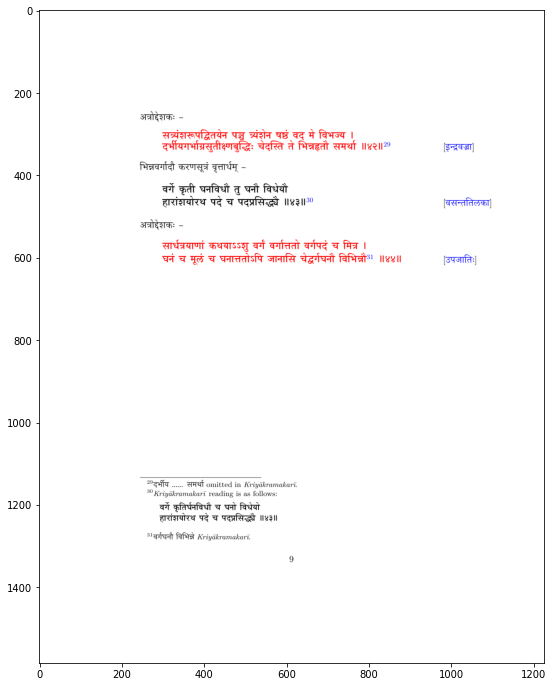

In [5]:
plt.figure(figsize=(12,12))
path_image="/content/input_images/page-0.jpeg"
img=cv2.imread(path_image)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

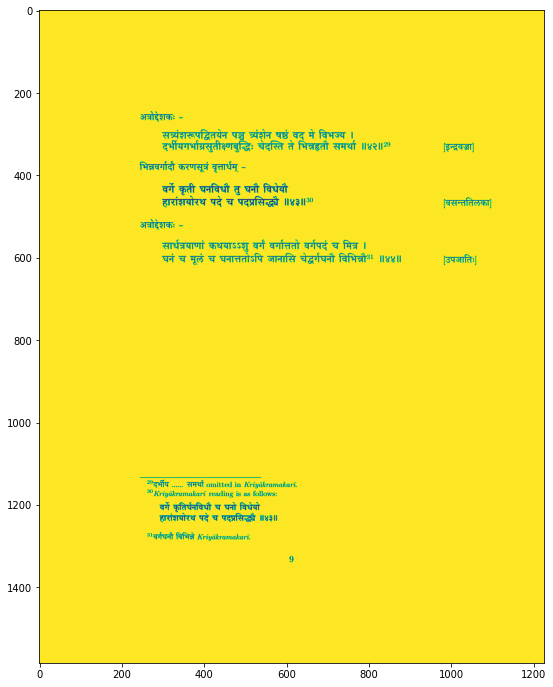

In [6]:
plt.figure(figsize=(12,12))
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [7]:
gray.shape

(1584, 1224)

In [8]:
blur=cv2.GaussianBlur(gray,(1,1),0)

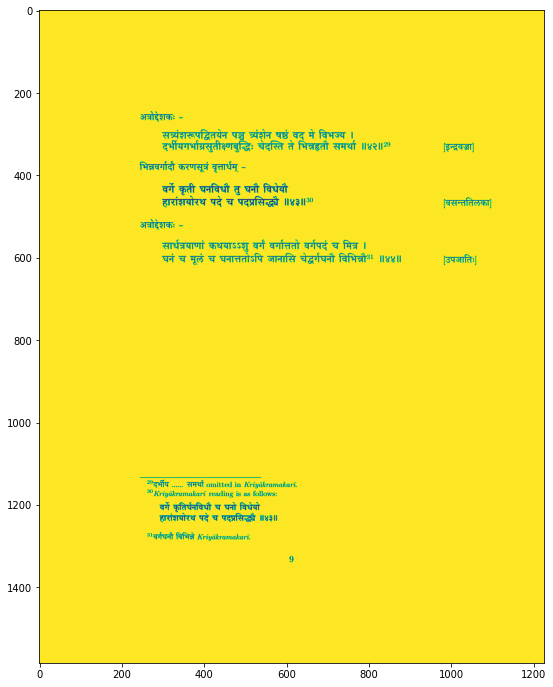

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(gray)

In [10]:
thresh=cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

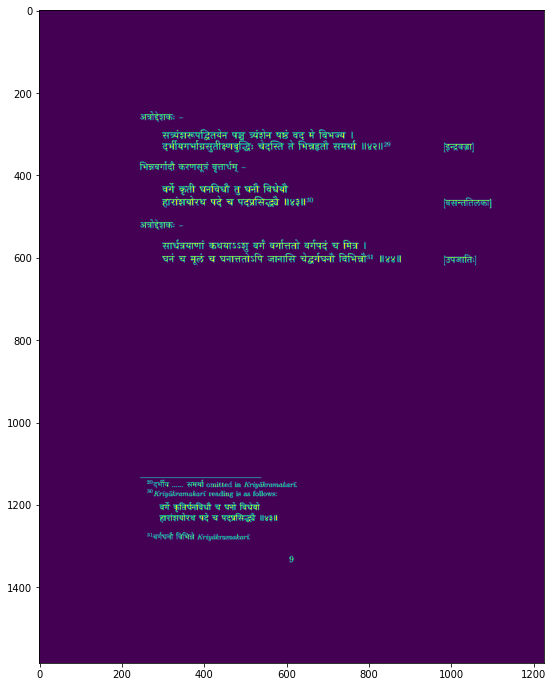

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(thresh)

In [14]:
kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(13,1))

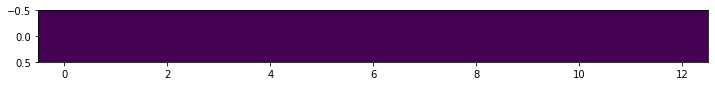

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(kernal)

In [16]:
dilate=cv2.dilate(thresh,kernal,iterations=1)

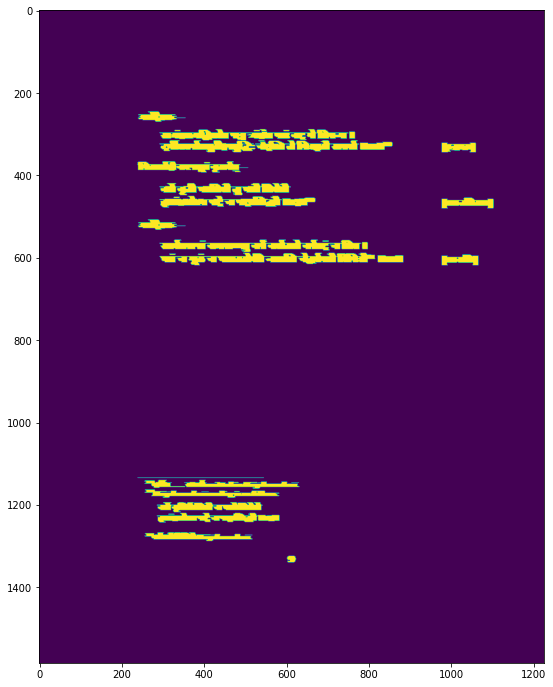

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(dilate)

In [18]:
cnts=cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
cnts=cnts[0] if len(cnts)==2 else cnts[1]

In [20]:
cnts=sorted(cnts,key=lambda x: cv2.boundingRect(x)[0])

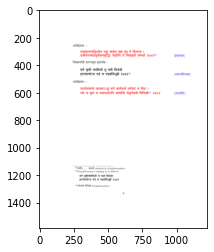

In [26]:
path_image="/content/input_images/page-0.jpeg"
img=cv2.imread(path_image)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [27]:
!mkdir output

mkdir: cannot create directory ‘output’: File exists


In [28]:
!mkdir output/image1
!mkdir output/image2
!mkdir output/image3
!mkdir output/image4
!mkdir output/image5

mkdir: cannot create directory ‘output/image1’: File exists
mkdir: cannot create directory ‘output/image2’: File exists
mkdir: cannot create directory ‘output/image3’: File exists
mkdir: cannot create directory ‘output/image4’: File exists
mkdir: cannot create directory ‘output/image5’: File exists


In [29]:
f=open('bounding_box.json','a') 
count=0
op='{'
cp='}'
for c in cnts:
  x,y,w,h=cv2.boundingRect(c)
  if w>200 and h>10:
    count+=1
    roi=img[y:y+h,x:x+w]
    coords=[[x, y],[x+w,y],[x,y+h],[x+w,y+h]]
    coords_str=f"box_{count}:{op}top_left:{coords[0]},top_right:{coords[1]},bottom_left:{coords[2]},bottom_right:{coords[3]}{cp},"
    cv2.rectangle(img,(x,y),(x+w,y+h),(36,255,12),2)
    cv2.imwrite(f'output/image1/box_{count}.jpeg',roi)
    f.write(coords_str)

cv2.imwrite(f'output/image1/output_image_1.jpeg',img)
f.close()

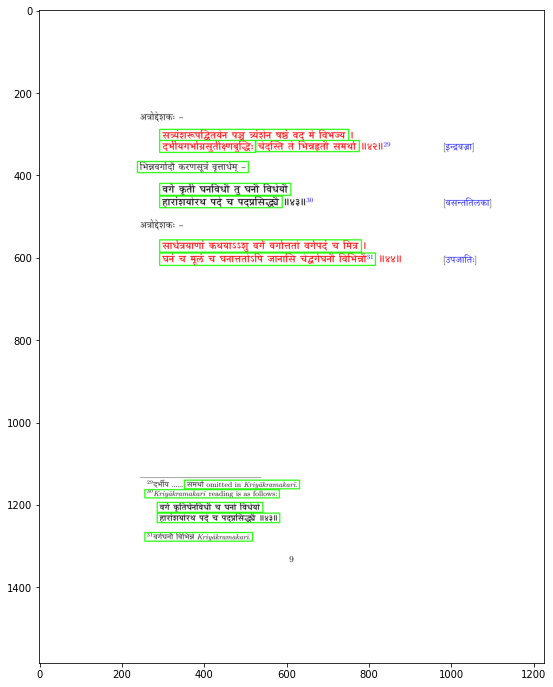

In [30]:
plt.figure(figsize=(12,12))
plt.imshow(img)

### **Creating function for above code**

In [ ]:
!mkdir input_images #place to store images extracted from pdf

In [ ]:
!mkdir output  #place to store output
!mkdir output/image1
!mkdir output/image2
!mkdir output/image3
!mkdir output/image4
!mkdir output/image5

In [ ]:
import glob, sys, fitz

def pdf2img(path):
  # To get better resolution
  zoom_x = 2.0  
  zoom_y = 2.0 
  mat = fitz.Matrix(zoom_x, zoom_y)  

  
  all_files = glob.glob(path)

  for filename in all_files:
      doc = fitz.open(filename)  # open document
      for page in doc:  # iterate through the pages
          pix = page.get_pixmap(matrix=mat)  # render page to an image
          pix.save("/content/input_images/page-%i.jpeg" % page.number)  # store image as a jpeg
  return 1
path = '/content/Sanskrit_Text.pdf'
pdf2img(path)#first create input_images folder on google colab before runing the code #!mkdir input_images

In [ ]:
#create a output folder and then subfolders as image1, image2 etc on google colab
def create_bounding_box(input_image_path,bounding_box_file_name,output_folder,output_image_path):
  img=cv2.imread(input_image_path)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  blur=cv2.GaussianBlur(gray,(1,1),0)
  thresh=cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
  kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(15,1))
  dilate=cv2.dilate(thresh,kernal,iterations=1)
  cnts=cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnts=cnts[0] if len(cnts)==2 else cnts[1]
  cnts=sorted(cnts,key=lambda x: cv2.boundingRect(x)[0])
  f=open(bounding_box_file_name,'a') 
  count=0
  op='{'
  cp='}'
  for c in cnts:
    x,y,w,h=cv2.boundingRect(c)
    if w>200 and h>10:
      count+=1
      roi=img[y:y+h,x:x+w]
      coords=[[x, y],[x+w,y],[x,y+h],[x+w,y+h]]
      coords_str=f"box_{count}:{op}top_left:{coords[0]},top_right:{coords[1]},bottom_left:{coords[2]},bottom_right:{coords[3]}{cp},"
      cv2.rectangle(img,(x,y),(x+w,y+h),(36,255,12),2)
      cv2.imwrite(f'{output_folder}/box_{count}.jpeg',roi)
      f.write(coords_str)
  cv2.imwrite(output_image_path,img)
  f.close()
  return 1

In [ ]:
for i in range(5): 
  input_image_path=f'/content/input_images/page-{i}.jpeg'
  bounding_box_file_name=f'output/image{i+1}/bounding_box_img_{i+1}.json'
  output_folder=f'output/image{i+1}'
  output_image_path=f'output/image{i+1}/output_image_{i+1}.jpeg'
  create_bounding_box(input_image_path,bounding_box_file_name,output_folder,output_image_path)

**More improvement can be done by playing with the parameters of various opencv function.**

In [ ]:
!zip -r './ouput.zip' '/content/output'

  adding: content/output/ (stored 0%)
  adding: content/output/image2/ (stored 0%)
  adding: content/output/image2/box_3.jpeg (deflated 7%)
  adding: content/output/image2/box_8.jpeg (deflated 17%)
  adding: content/output/image2/.ipynb_checkpoints/ (stored 0%)
  adding: content/output/image2/box_6.jpeg (deflated 16%)
  adding: content/output/image2/box_11.jpeg (deflated 8%)
  adding: content/output/image2/box_4.jpeg (deflated 3%)
  adding: content/output/image2/box_1.jpeg (deflated 15%)
  adding: content/output/image2/box_9.jpeg (deflated 16%)
  adding: content/output/image2/bounding_box_img_2.json (deflated 74%)
  adding: content/output/image2/box_5.jpeg (deflated 6%)
  adding: content/output/image2/box_7.jpeg (deflated 17%)
  adding: content/output/image2/box_2.jpeg (deflated 7%)
  adding: content/output/image2/output_image_2.jpeg (deflated 29%)
  adding: content/output/image2/box_10.jpeg (deflated 15%)
  adding: content/output/image4/ (stored 0%)
  adding: content/output/image4/box

In [ ]:
!zip -r './input.zip' '/content/input_images'

  adding: content/input_images/ (stored 0%)
  adding: content/input_images/page-1.jpeg (deflated 12%)
  adding: content/input_images/page-0.jpeg (deflated 12%)
  adding: content/input_images/page-3.jpeg (deflated 7%)
  adding: content/input_images/page-2.jpeg (deflated 9%)
  adding: content/input_images/page-4.jpeg (deflated 8%)
